# Q2.2 Quadratic Least Square Fitting

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable as ptbl

## Importing database

In [2]:
data = pd.read_csv('Quadratic_curve_fitting_dataset.csv')

## Visualizing database

In [3]:
data.head()

,x,y
0,2,5
1,5,140
2,8,455
3,11,950
4,14,1625


## Extracing Dependent and independent variables from database in X and y variables respectively

In [4]:
X = data.iloc[:,0].values
y = data.iloc[:,1].values

## Quadratic Least square fitting function

## y = c1*x^2 + c2*x + c3
 

In [5]:
def QuadraticFitting(x,y):

    x_four_sum = sum(x**4)
    x_three_sum = sum(x**3)
    x_sq_sum = sum(x**2)
    x_sum = sum(x)
    n = len(x)

    y_xsq_sum = sum(y*(x**2))
    yx_sum = sum(x*y)
    y_sum = sum(y)

    A = np.array([
        [x_four_sum,  x_three_sum,  x_sq_sum],
        [x_three_sum, x_sq_sum,     x_sq_sum],
        [x_sq_sum,    x_sum,        n],
        ])

    b = np.array([
        [y_xsq_sum],
        [yx_sum],
        [y_sum]
        ])

    invA = np.linalg.inv(A)
    M = np.matmul(invA,b)
    
    return M


## Calling Quadratic least square fitting function on given database

In [6]:
c1, c2, c3 = QuadraticFitting(X,y)

## Visualizing coefficients and constants

In [7]:
print(c1,c2,c3)

[9.99671939] [-24.47209128] [-0.008132]


## Calculating Approximate Values

In [8]:
y_pred = c1*(X**2) + c2*X + c3

## Table of actual values and predicted values

In [9]:
table = ptbl(['X','y','y-predicted'])
for i in range(len(X)):
    table.add_row([X[i],y[i],y_pred[i]])
print(table)

+-----+--------+--------------------+
|  X  |   y    |    y-predicted     |
+-----+--------+--------------------+
|  2  |   5    | -8.965437008384214 |
|  5  |  140   | 127.54939634349978 |
|  8  |  455   | 444.00517872570873 |
|  11 |  950   | 940.4019101382426  |
|  14 |  1625  | 1616.7395905811015 |
|  17 |  2480  | 2473.0182200542854 |
|  20 |  3515  | 3509.2377985577946 |
|  23 |  4730  | 4725.3983260916275 |
|  26 |  6125  | 6121.499802655787  |
|  29 |  7700  | 7697.5422282502695 |
|  32 |  9455  |  9453.52560287508  |
|  35 | 11390  | 11389.449926530213 |
|  38 | 13505  | 13505.31519921567  |
|  41 | 15800  | 15801.121420931455 |
|  44 | 18275  | 18276.868591677565 |
|  47 | 20930  |  20932.556711454   |
|  50 | 23765  | 23768.18578026076  |
|  53 | 26780  | 26783.75579809784  |
|  56 | 29975  | 29979.26676496525  |
|  59 | 33350  | 33354.718680862985 |
|  62 | 36905  | 36910.11154579104  |
|  65 | 40640  | 40645.44535974943  |
|  68 | 44555  | 44560.72012273813  |
|  71 | 4865

## Visualizing Best Fit Curve

### Note: The database used here was generated by me using Microsoft EXCEL
### that's why the actual points are perfectly overlapping with approximate line

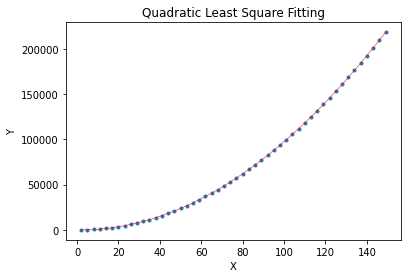

In [10]:
plt.scatter(X,y, marker = '.')
plt.plot(X,y_pred,color = 'red',linewidth = 0.5)
plt.title('Quadratic Least Square Fitting')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Evaluating Error in reconstruction

In [11]:
max_error = max(abs(y-y_pred)/y)
print(max_error)

2.7930874016768428


## here the first approximate value is way off from the actual value
## that's why the error is too large

In [12]:
for i in range(5):
    print(f"y[{i}] = {y[i]}\ty_predict[{i}] = {y_pred[i]}")

y[0] = 5	y_predict[0] = -8.965437008384214
y[1] = 140	y_predict[1] = 127.54939634349978
y[2] = 455	y_predict[2] = 444.00517872570873
y[3] = 950	y_predict[3] = 940.4019101382426
y[4] = 1625	y_predict[4] = 1616.7395905811015


## Also it can be seen that as we go on calculating the approximate values 
## the error goes on decreasing 